In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### Data checks to perform
1. Check Missing Values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of the dataset
6. Check various categories present in the different categorical column

In [4]:
## checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df[df.duplicated()] ## No duplicates

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [6]:
df.duplicated().sum() 

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## checking the unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
## checking the stats
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


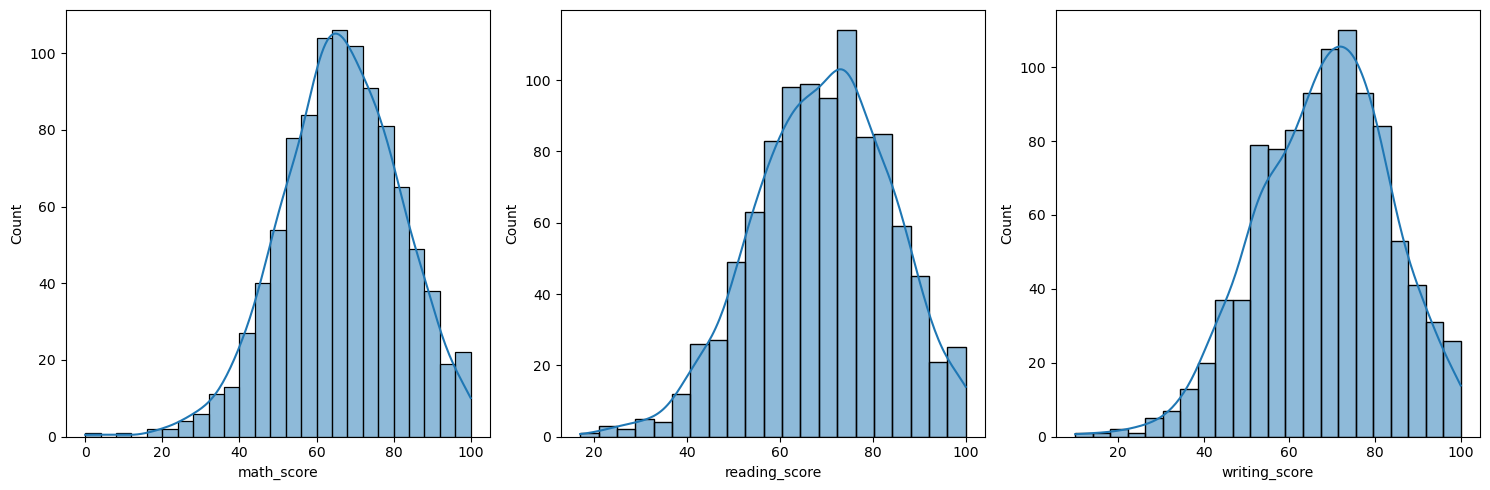

In [10]:
cols = 3
rows = 1
## cols * rows should be = number of numerical columns present in your dataset
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax, kde = True)
    
fig.tight_layout()  
plt.show()

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

In [12]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [13]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
## Explore more vIsualization

<AxesSubplot: xlabel='Average', ylabel='Count'>

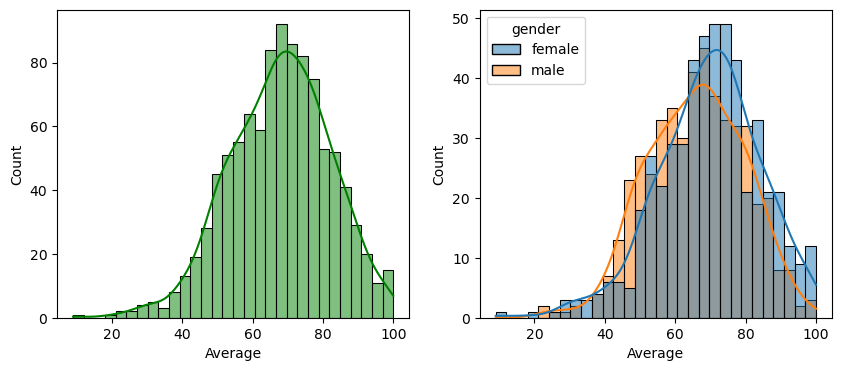

In [18]:
fig, axis = plt.subplots(1,2, figsize = (10,4))
plt.subplot(121)
sns.histplot(x='Average',data = df,  bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(x= 'Average', data = df, bins = 30, kde = True, hue = df.gender)

In [19]:
## Insights - Female students tend to perform well than male students

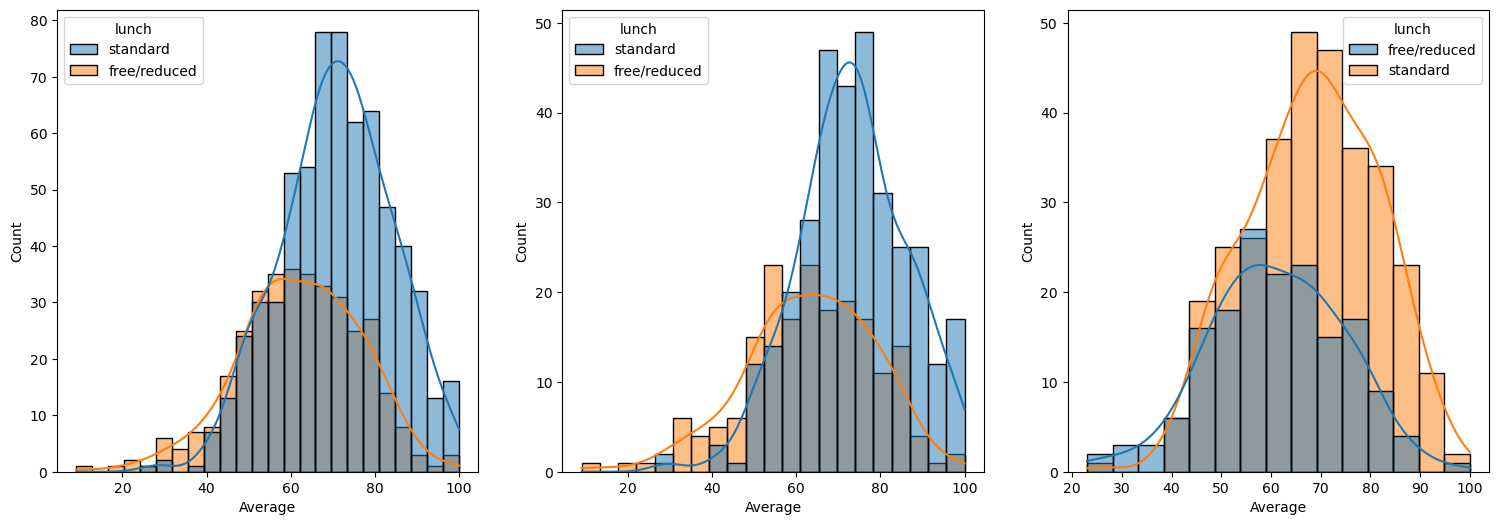

In [20]:
fig, axis = plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(x='Average',data = df, kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(x='Average',data = df[df.gender == 'female'], kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(x='Average',data = df[df.gender == 'male'], kde = True, hue = 'lunch')
plt.show()

In [21]:
## Insights - standard lunch helps students perform well in exams

In [22]:
## Standard lunch helps perform well in exams in case of both males and females

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


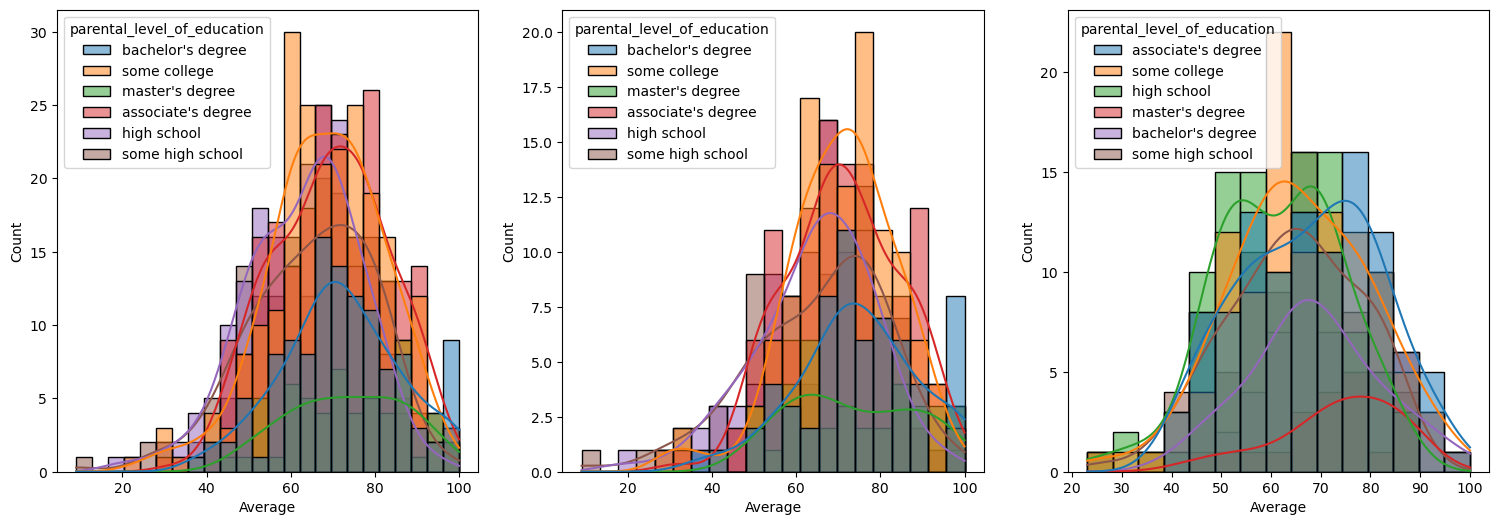

In [24]:
fig, axis = plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(x='Average',data = df, kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(x='Average',data = df[df.gender == 'female'], kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(x='Average',data = df[df.gender == 'male'], kde = True, hue = 'parental_level_of_education')
plt.show()

1. In general the parental education does not play much role.
2. 2nd plot shows that the parents whose education is of associate or masters degree their male child tend to perform well
3. 3rd plot we can see that their is no effect of parental education on female students

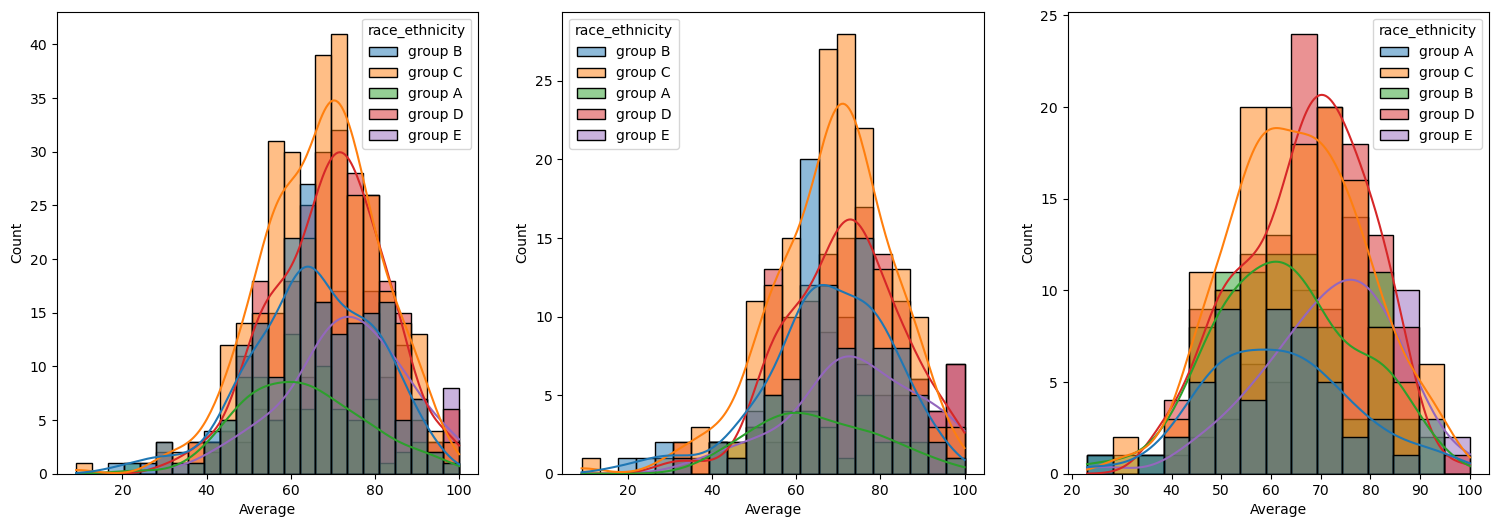

In [26]:
fig, axis = plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(x='Average',data = df, kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(x='Average',data = df[df.gender == 'female'], kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(x='Average',data = df[df.gender == 'male'], kde = True, hue = 'race_ethnicity')
plt.show()

1. students of group A and B tends to perform poorly in exams
2. students of group A and B tends to perform poorly in exams irrespective of Gender

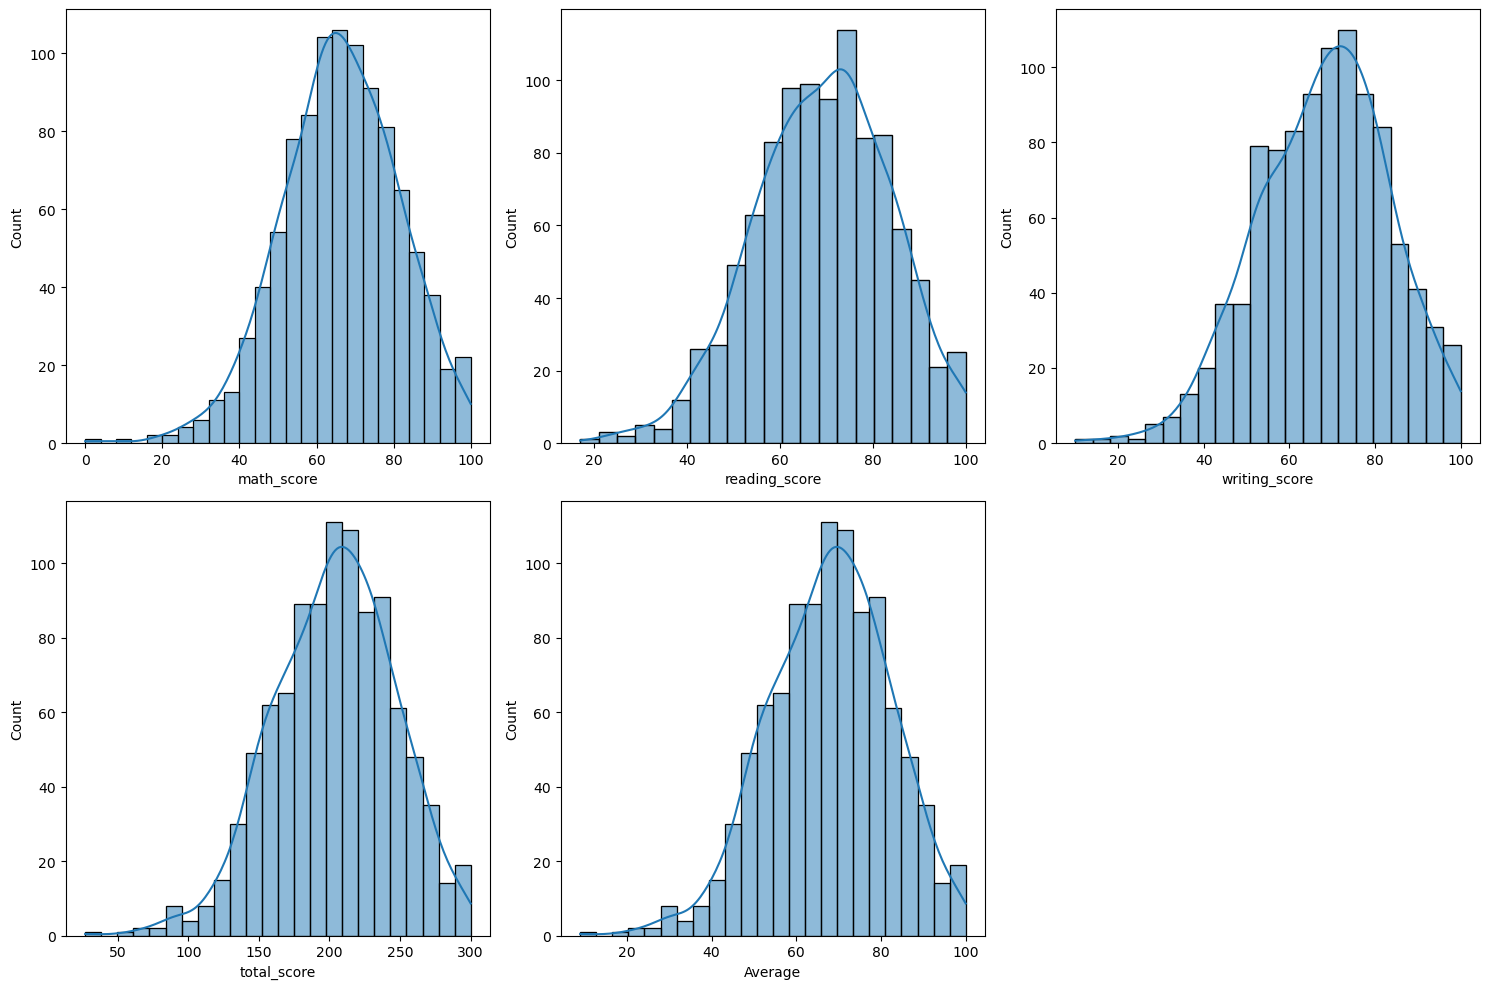

In [29]:
cols = 3
rows = 2
## cols * rows should be = number of numerical columns present in your dataset
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax, kde = True)
    
fig.tight_layout()  
plt.show()

<AxesSubplot: >

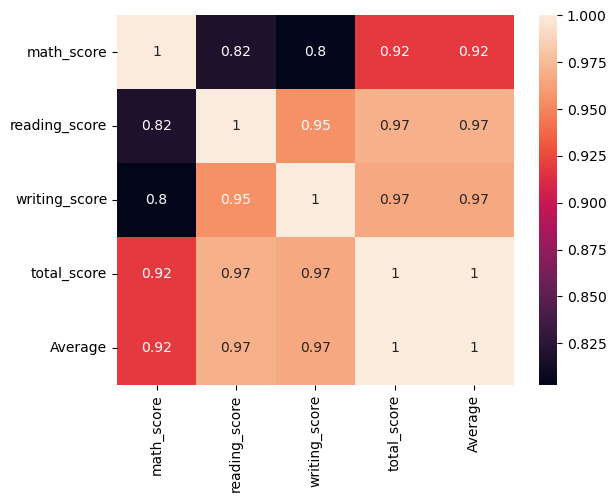

In [30]:
sns.heatmap(df.corr(), annot = True)